# Errores en el calculo numerico

Los numeros en un computador son representados en el sistema binario. 

A continuacion se crea una funcion para obtener la representacion binaria de un numero decimal.

In [46]:
def entero_a_binario(numero):
    """Convierte un entero a binario"""
    if numero == 0:
        return "0"
    
    binario = ""
    original = numero
    pasos = []
    
    while numero > 0:
        residuo = numero % 2
        cociente = numero // 2
        binario = str(residuo) + binario
        numero = cociente
    
    return binario

In [47]:
entero_a_binario(9)

'1001'

In [48]:
# Ejemplos con enteros
ejemplos_enteros = [5, 13, 42, 255]

for num in ejemplos_enteros:
    binario_manual = entero_a_binario(num)
    binario_python = bin(num)[2:]  # Quitar el prefijo '0b'
    print(f"Verificación: {num} = {binario_python} (Python), {binario_manual} (Manual)")

Verificación: 5 = 101 (Python), 101 (Manual)
Verificación: 13 = 1101 (Python), 1101 (Manual)
Verificación: 42 = 101010 (Python), 101010 (Manual)
Verificación: 255 = 11111111 (Python), 11111111 (Manual)


In [49]:
def binario_a_entero(binario):
    """Convierte binario a entero"""
    
    binario = int(binario)
    entero = 0
    p = 0
    
    while binario > 0:
        residuo = binario % 10
        binario //= 10
        entero += residuo*(2**p)
        p +=1
    
    return entero

binario_a_entero('11111101') == int('11111101',2)

True

**NÚMEROS DECIMALES - EL PROBLEMA**

Funcion para la representacion binaria de un numero con cifras decimales

In [50]:
def decimal_a_binario_fraccion(decimal, precision=10):
    """Convierte la parte decimal a binario"""
    if decimal == 0:
        return "0"
    
    binario = ""
    pasos = []
    original = decimal
    
    for i in range(precision):
        decimal *= 2
        if decimal >= 1:
            binario += "1"
            decimal -= 1
        else:
            binario += "0"
        
        if decimal == 0:
            break
    
    return binario

In [51]:
decimal_a_binario_fraccion(0.0625, 10)

'0001'

In [52]:
decimal_a_binario_fraccion(0.1, 20)

'00011001100110011001'

# Error punto flotante

In [53]:
print(0.2 + 0.1 - 0.3)

5.551115123125783e-17


In [54]:
print((2**0.5)**2 - 2)

4.440892098500626e-16


El error crece como $N \epsilon$. Para $0.1+0.2+0.3$ el error al realizar 10000 operaciones es

In [55]:
error_acumulado = 0
for i in range(10000):
    error_acumulado += 0.2+0.1-0.3
print(f"error acumulado = {error_acumulado}")

error acumulado = 5.551115123125783e-13


Para $(\sqrt{2})^2-2$

In [56]:
error_acumulado = 0
for i in range(10000):
    error_acumulado += (2**0.5)**2 - 2
print(f"error acumulado = {error_acumulado}")

error acumulado = 4.440892098500626e-12


## Problemas
Hacer codigo para generar la sucesion de Fibonacci

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
fibo = [0,1]
N = 19
for i in range(1,N):
    fibo.append(fibo[i-1]+fibo[i])
print(fibo)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [92]:
fibo = np.array(fibo)
print(fibo[2:])
print(fibo[1:-1])

[   1    2    3    5    8   13   21   34   55   89  144  233  377  610
  987 1597 2584 4181]
[   1    1    2    3    5    8   13   21   34   55   89  144  233  377
  610  987 1597 2584]


In [87]:
phi = fibo[2:]/fibo[1:-1]

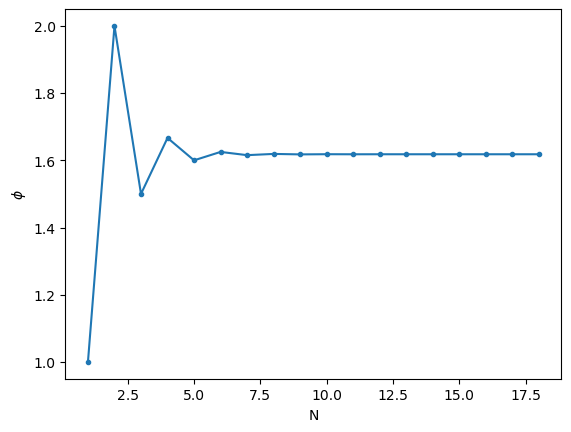

In [96]:
plt.plot(np.arange(1,N),phi, '.-')
plt.xlabel('N')
plt.ylabel(r'$\phi$')
plt.show()


## Mapa logistico
$ x_{n+1} = r\,x_n\,(1-x_n)$ con $0<x<1$

In [109]:
def logistic_map(r,x0,N):
    x = [x0]
    for i in range(1,N):
        x.append(r*x[i-1]*(1-x[i-1]))
    return x

In [117]:
xm = logistic_map(2.8, 0.1, 10)

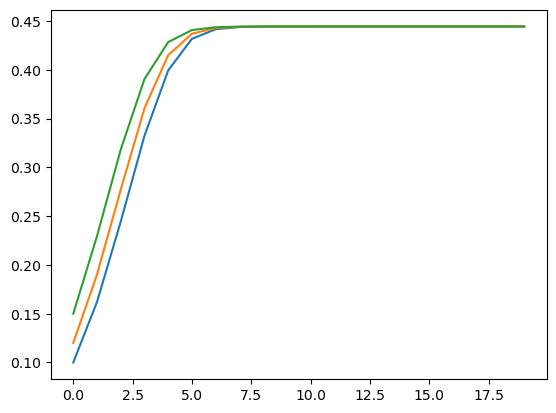

In [225]:
plt.plot(logistic_map(1.8, 0.1, 20))
plt.plot(logistic_map(1.8, 0.12, 20))
plt.plot(logistic_map(1.8, 0.15, 20))

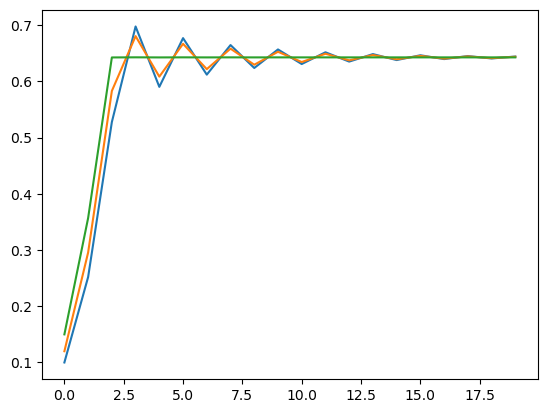

In [215]:
plt.plot(logistic_map(2.8, 0.1, 20))
plt.plot(logistic_map(2.8, 0.12, 20))
plt.plot(logistic_map(2.8, 0.15, 20))

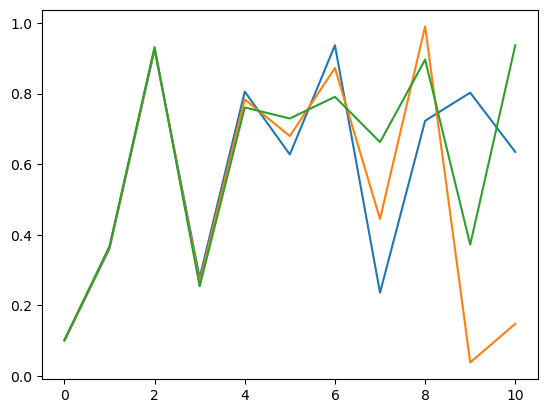

In [214]:
plt.plot(logistic_map(4.01, 0.1, 11))
plt.plot(logistic_map(4.01, 0.101, 11))
plt.plot(logistic_map(4.01, 0.102, 11))

In [187]:
def cobweb_plot(r,x0,N):
    x = [x0]
    x_cw = [x0]
    for i in range(1,N):
        y = (r*x[i-1]*(1-x[i-1]))
        x.append(y)
        x_cw.append(y)
        x_cw.append(y)
        plt.text(x_cw[2*i-1],x_cw[2*i], f"{i}", ha='right', va='bottom')
    plt.plot(x_cw[:-1], x_cw[1:], '.-')

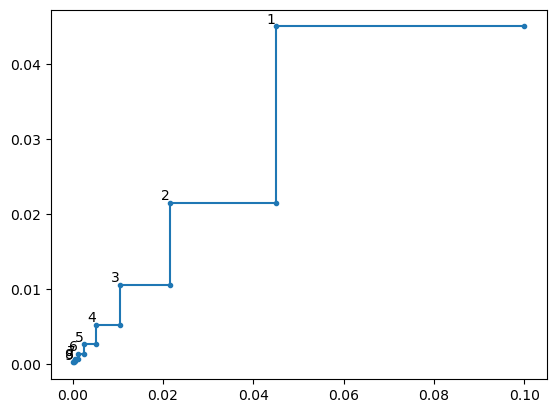

In [188]:
cobweb_plot(0.5,0.1,10)

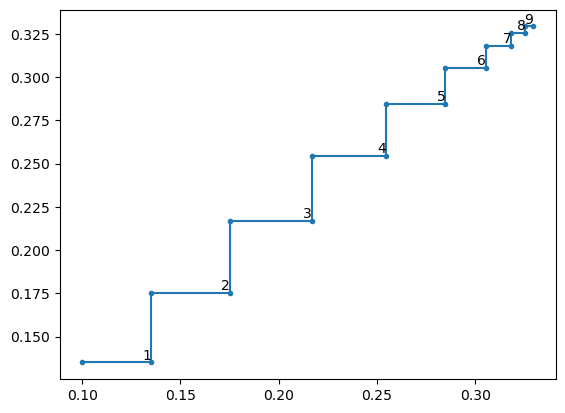

In [189]:
cobweb_plot(1.5,0.1,10)

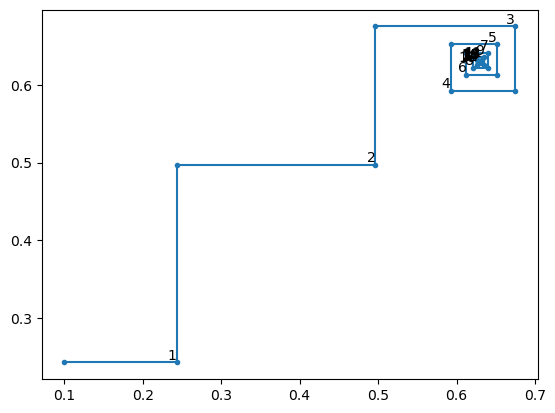

In [226]:
cobweb_plot(2.7,0.1,20)